## KNN model for classification of animals

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#### Importing dataset

In [4]:
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo.nunique()  

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [6]:
print(zoo.type.unique(), zoo.legs.unique())

[1 4 2 7 6 5 3] [4 0 2 6 8 5]


#### We can see that most of the columns are having only 2 values (1,0)
###### legs has [4 0 2 6 8 5] unique values and type column has [1 4 2 7 6 5 3] unique values

In [7]:
zoo.shape

(101, 18)

In [8]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [9]:
corr = zoo.corr()

<AxesSubplot:>

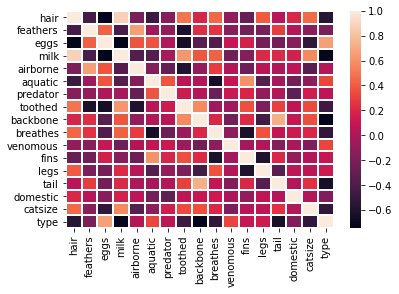

In [10]:
sns.heatmap(corr,  linewidth = 1 ,robust = True)

### Inferences drawn from heatmap

Hair and catsize are having almost same correlation with type so we can drop one variable

toothed and breathes features are almost having same correlation for classifying the type of animal so we can classify using any one feature from these

aquatic and venomous are having same correlation so we can use any one from these to classify the animal

airborne and predator not much correlated to type to classify so they may be much useful for our classification

After doing all these modification to our data we build the classification model



0    0.574257
1    0.425743
Name: hair, dtype: float64
0    0.80198
1    0.19802
Name: feathers, dtype: float64
1    0.584158
0    0.415842
Name: eggs, dtype: float64
0    0.594059
1    0.405941
Name: milk, dtype: float64
0    0.762376
1    0.237624
Name: airborne, dtype: float64
0    0.643564
1    0.356436
Name: aquatic, dtype: float64


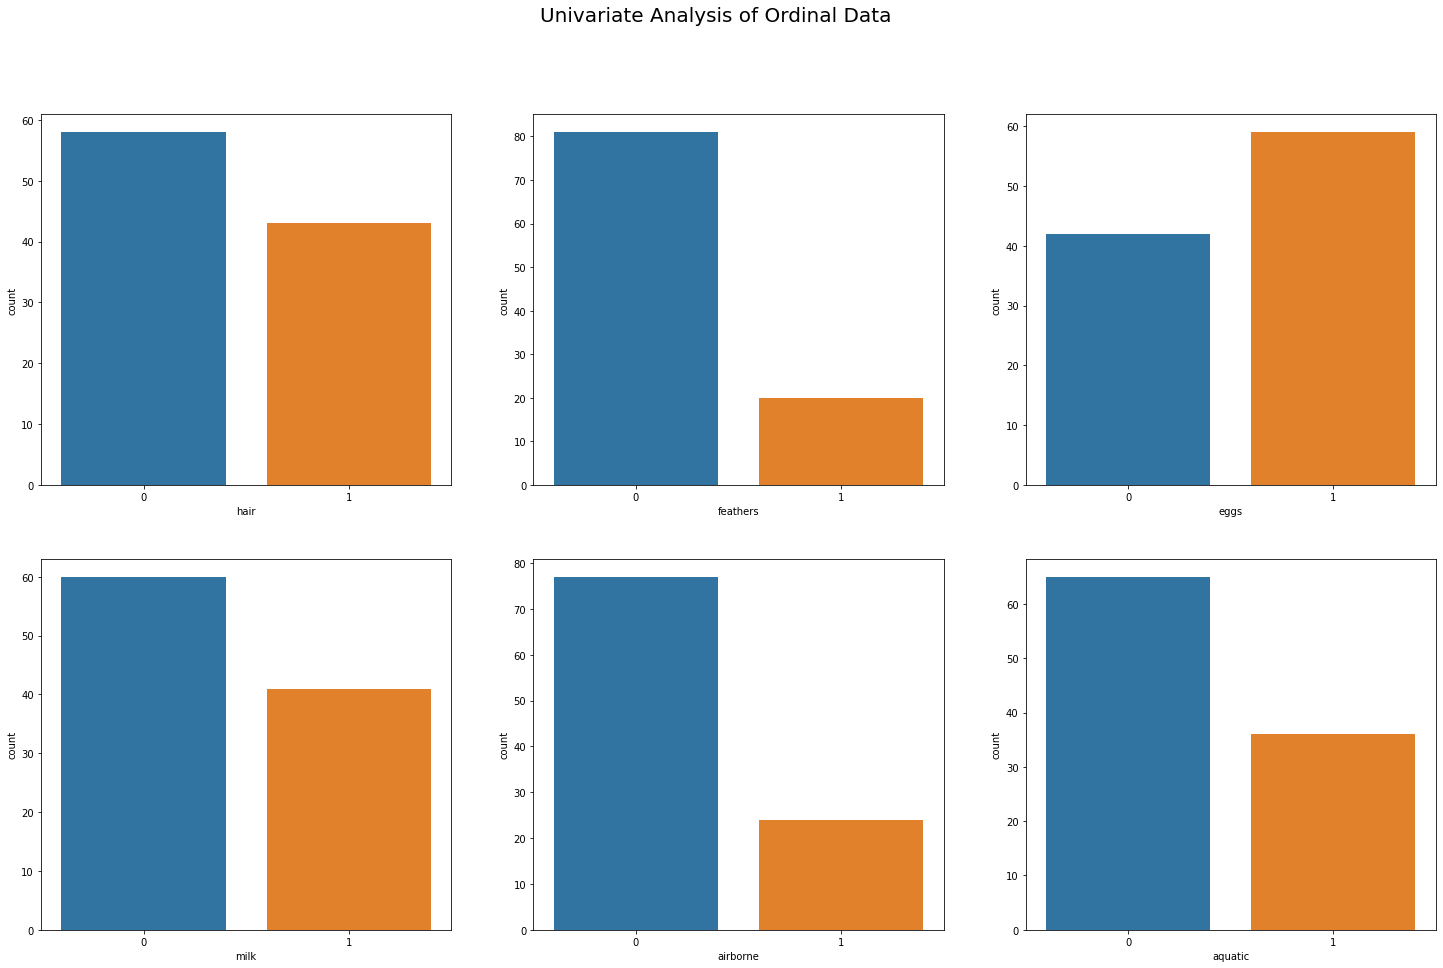

In [11]:
fig, axes = plt.subplots(2,3, figsize=(25, 15))
fig.suptitle('Univariate Analysis of Ordinal Data',fontsize=20)

import warnings
warnings.filterwarnings('ignore')
sns.countplot(zoo.hair, ax =axes[0,0])
sns.countplot(zoo.feathers,ax =axes[0,1])
sns.countplot(zoo.eggs, ax =axes[0,2])
sns.countplot(zoo.milk, ax = axes[1,0])
sns.countplot(zoo.airborne, ax =axes[1,1])
sns.countplot(zoo.aquatic, ax = axes[1,2])
print(zoo['hair'].value_counts(normalize=True))
print(zoo['feathers'].value_counts(normalize=True))
print(zoo['eggs'].value_counts(normalize=True))
print(zoo['milk'].value_counts(normalize=True))
print(zoo['airborne'].value_counts(normalize=True))
print(zoo['aquatic'].value_counts(normalize=True))

In [12]:
data = zoo.drop(['catsize','breathes', 'venomous','predator'], axis = 1)
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,toothed,backbone,fins,legs,tail,domestic,type
0,aardvark,1,0,0,1,0,0,1,1,0,4,0,0,1
1,antelope,1,0,0,1,0,0,1,1,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,1,0,4
3,bear,1,0,0,1,0,0,1,1,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,0,4,1,0,1


In [ ]:
x = data.iloc[:, 1:13]
x

In [ ]:
y = data.iloc[:, [13]]
y = y.values

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
kfold = KFold(n_splits = 10)
model= KNeighborsClassifier(n_neighbors = 1)  ## building the model with optimal value we got from GridsearchCV
results = cross_val_score(model, x, y, cv =kfold)
results

In [ ]:
print(results.mean())

### GridSearchCV is used to get the optimal value of K

In [ ]:
from sklearn.model_selection import GridSearchCV
n_neigh = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neigh)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid  = param_grid)
grid.fit(x,y)

In [ ]:
print(grid.best_score_)

In [ ]:
print(grid.best_params_)

In [ ]:
## Visualizing the CV results
k_range= range(1,40,2)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 10)
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)

In [ ]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(x,y, test_size = 0.2)
(trainx.shape, testx.shape, trainy.shape, testy.shape)

In [ ]:
k_range = range(1,40,2)
k_score_train = []
k_score_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(trainx, trainy)
    pred_train = knn.predict(trainx)
    score = np.mean(trainy == pred_train) 
    k_score_train.append(score)
    pred_test = knn.predict(testx)
    score_test = np.mean(testy == pred_test)
    k_score_test.append(score_test)
    
plt.plot(k_range, k_score_train)
plt.plot(k_range, k_score_test)
plt.show()

###### From this graph we can see that both train and test are resulting with same accuracies . By this we can say our model is right model so we can choose k value as k = 1

In [ ]:
accuracy_score(testy,pred_test)

In [ ]:
accuracy_score(trainy,pred_train)

In [ ]:
kfold1 = KFold(n_splits = 10)
model1= KNeighborsClassifier(n_neighbors = 9) ## Choosing another optimal value from the graph 
results1 = cross_val_score(model1, x, y, cv =kfold1)
results1

In [ ]:
print(results1.mean())

In [ ]:
kfold2 = KFold(n_splits = 10)
model2= KNeighborsClassifier(n_neighbors = 15) ## Choosing another optimal value from the graph 
results2 = cross_val_score(model2, x, y, cv =kfold2)
results2

In [ ]:
print(results2.mean())